# <center>Kaggle Credit Card Fraud Detection</center>

## Table of contents
> ### 1. [Understanding the overall data](#1) 
> ### 2. [Understanding the individual feature](#2)
> ### 3. [Data cleaning](#3)
> ### 4. [Model with row data](#4)
> ### 5. [Feature procesing](#5)
> ### 6. [Feature selection](#6)
> ### 7. [Train and predict](#7)


<a id='1'></a>
# 1. Understanding the overall data


> #### 1.1 [Load necesarry libraries](#1.1)
> #### 1.2 [Load data](#1.2)
> #### 1.3 [Check data in row format](1.3)
> #### 1.4 [Check missing data](#1.4)
> #### 1.5 [Meaning of each feature](#1.5)

<a id='1.1'></a>
### 1.1 Load necesarry libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

<a id='1.2'></a>
### 1.2 Load data


In [2]:
df = pd.read_csv("../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")

<a id='1.3'></a>
### 1.3  Check data in row format


In [3]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.iloc[-5:,:].head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


#### Note
* 25 columns in total (**default.payment.next.month** is the target)
* 30000 samples
* ID is given to each card

<a id='1.4'></a>
### 1.4 Check missing data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

#### Note
* No missing data


<a id='1.5'></a>
### 1.5 Meaning of each feature

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


#### Note
I categorized the features into 3 categories: User's card information, User's demograohic information, Client's payment information in the last 6 months.



#### Client's card information 
* LIMIT_BAL
    * Upper limit of credit card
    * 10000.0 ~ 1000000.0 (in Hong Kong Dollars)
    
#### Client's demographic information

* SEX
    * Sex of the card user
    * male or female
* EDUCATION
    * Final education level of the card user
    * Graduate school, Undergraduate school, High school, Others, Unknown
* MARRIAGE
    * Marriage status of the card user
    * Married, Single, Others, Unknown
* AGE
    * Age of the card user
    * 21 ~ 79
    
#### Client's payment information in last 6 months

* PAY
    * Payment status of last 6 months
    * No payment, Duly payment, Revolving Payment, Delay (for 1~8 months + more than 9 months)
* BILL_AMT
    * Amounts of bill in last 6 months
    * -339603.0 ~ 1664089.0 (in Hong Kong Dollars)
* PAY_AMT
    * Amounts paid in the previous month in last 6 months
    * 0.0 ~ 1684259.0 (in Hong Kong Dollars)
    


<a id='2'></a>
# 2. Understanding the individual feature


I will take a look at the distribution of individual feature.

> #### 2.1 [default.payment.next.month](#2.1)
> #### 2.2 [LIMIT_BAL](#2.2)
> #### 2.3 [SEX](#2.3)
> #### 2.4 [EDUCATION](#2.4)
> #### 2.5 [MARRIAGE](#2.5)
> #### 2.6 [AGE](#2.6)
> #### 2.7 [PAY](#2.7)
> #### 2.8 [PAY_AMT](#2.8)
> #### 2.9 [BILL_AMT](#2.9)

<a id='2.1'></a>
## 2.1 default.payment.next.month

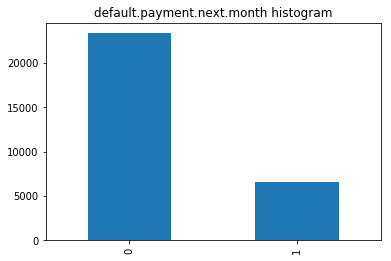

Number of frauds clients:  6636
Fraud percentage: 22.12 %


In [7]:
df2 = df.copy()
classes = pd.value_counts(df2['default.payment.next.month'], sort = True).sort_index()
classes.plot(kind = 'bar')
plt.title("default.payment.next.month histogram")
plt.show()
print('Number of frauds clients: ', len(df2[df2['default.payment.next.month'] == 1]))
print('Fraud percentage:', round(df2['default.payment.next.month'].value_counts()[1]/len(df2) * 100,2), "%")

#### Note
* 22.12 % of the clients are fraud. 
* The data is a little bit imbalanced.

<a id='2.1'></a>
## 2.2   LIMIT_BAL

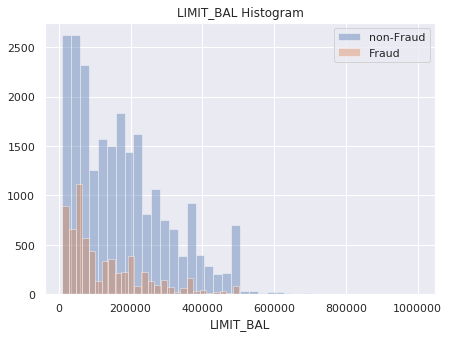

In [8]:
sns.set()
fig = plt.figure(figsize = (7,5))
ax = plt.subplot()

sns.distplot(df2["LIMIT_BAL"][df2['default.payment.next.month']==0], bins = 40, label = 'non-Fraud',kde = False)
sns.distplot(df2["LIMIT_BAL"][df2['default.payment.next.month']==1], bins = 40, label = 'Fraud',kde = False)

plt.legend(loc = 'upper right')
plt.title("LIMIT_BAL Histogram")
fig.show()

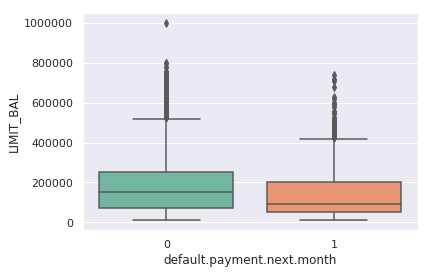

In [9]:
sns.boxplot(x='default.payment.next.month',y='LIMIT_BAL',data=df2,palette='Set2')

#### Note
* Extremelly large values in upper range.
* Higher concentration at certain values (e.g: 500000). -> Possibly because there are specific card types like Family credit card. 
* At extremelly high values, no fraud is observed. 

<a id='2.3'></a>
## 2.3 SEX

default.payment.next.month      0     1  Fraud_rate
SEX                                                
female                      14349  3763    0.207763
male                         9015  2873    0.241672


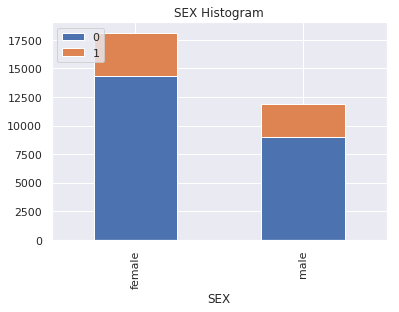

In [10]:
df2 = df.copy()
SEX_dict = {1:"male", 2:"female"}
df2['SEX'] = df2['SEX'].map(SEX_dict)

df_sex = df2.groupby(['SEX', 'default.payment.next.month']).size().unstack(1)
df_sex.plot(kind='bar', stacked = True)
plt.legend(loc = 'upper left')
plt.title("SEX Histogram")
fig.show()

df_sex['Fraud_rate'] = (df_sex[df_sex.columns[1]]/(df_sex[df_sex.columns[0]] + df_sex[df_sex.columns[1]]))
print(df_sex)

#### Note
* There is a greater number of female clients than male.
* Fraud rate is lower for female. 

<a id='2.4'></a>
## 2.4 EDUCATION


In [11]:

EDUCATION_dict = {0:"error", 1:"graduate school", 2:"undergraduate", 3:"high school", 4:"others", 5:"unknown", 6:"unknown"}

default.payment.next.month        0       1  Fraud_rate
EDUCATION                                              
error                          14.0     NaN         NaN
graduate school              8549.0  2036.0    0.192348
high school                  3680.0  1237.0    0.251576
others                        116.0     7.0    0.056911
undergraduate               10700.0  3330.0    0.237349
unknown                       305.0    26.0    0.078550


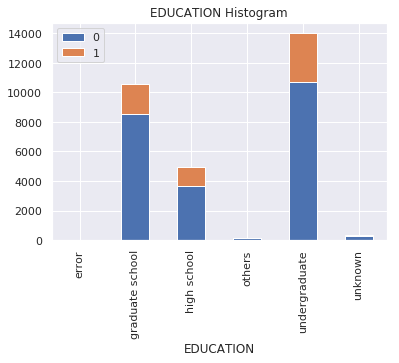

In [12]:
df2 = df.copy()

EDUCATION_dict = {0:"error", 1:"graduate school", 2:"undergraduate", 3:"high school", 4:"others", 5:"unknown", 6:"unknown"}
df2['EDUCATION'] = df2['EDUCATION'].map(EDUCATION_dict)
df_ed = df2.groupby(['EDUCATION', 'default.payment.next.month']).size().unstack(1)
df_ed.plot(kind='bar', stacked = True)
plt.legend(loc = 'upper left')
plt.title("EDUCATION Histogram")

fig.show()

df_ed['Fraud_rate'] = (df_ed[df_ed.columns[1]]/(df_ed[df_ed.columns[0]] + df_ed[df_ed.columns[1]]))
print(df_ed)

#### Note
* Most of clients are distributed in graduate school, high school and undergraduate. 
* Fraud rates of the minority classes are low. I will combine the three classes together later. 

<a id='2.5'></a>
## 2.5 MARRIAGE

default.payment.next.month      0     1  Fraud_rate
MARRIAGE                                           
married                     10453  3206    0.234717
others                        239    84    0.260062
single                      12623  3341    0.209283
unknown                        49     5    0.092593


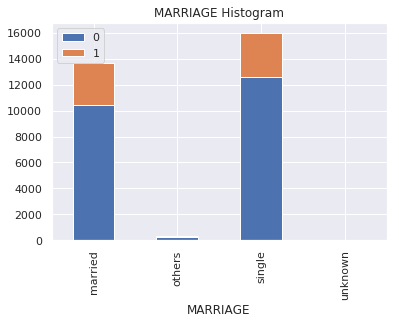

In [13]:
df2 = df.copy()

MARRIAGE_dict  = {0: 'unknown', 1:"married", 2:"single", 3:"others"}
df2['MARRIAGE'] = df2['MARRIAGE'].map(MARRIAGE_dict)

df_mar = df2.groupby(['MARRIAGE', 'default.payment.next.month']).size().unstack(1)
df_mar.plot(kind='bar', stacked = True)
plt.legend(loc = 'upper left')
plt.title("MARRIAGE Histogram")
fig.show()

df_mar['Fraud_rate'] = (df_mar[df_mar.columns[1]]/(df_mar[df_mar.columns[0]] + df_mar[df_mar.columns[1]]))
print(df_mar)

#### Note
* Others have small samples, but the fraud rate is higher than married or single people. 
* Single people have the least fraud rate. 

<a id='2.6'></a>
## 2.6 AGE

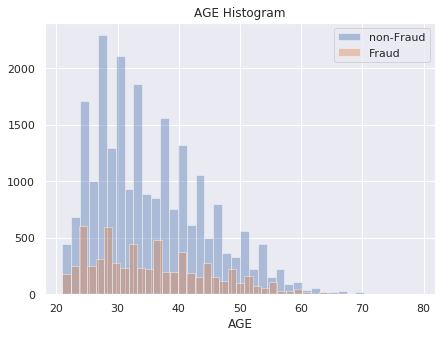

In [14]:
sns.set()
fig = plt.figure(figsize = (7,5))
ax = plt.subplot()

sns.distplot(df2["AGE"][df2['default.payment.next.month']==0], bins = 40, label = 'non-Fraud',kde = False)
sns.distplot(df2["AGE"][df2['default.payment.next.month']==1], bins = 40, label = 'Fraud',kde = False)

plt.legend(loc = 'upper right')
plt.title("AGE Histogram")
fig.show()

* It is difficult to see the trend, so I will categorize into 20s, 30s, 40s, 50s, 60s, 70s and 80s.

default.payment.next.month     0     1  Fraud_rate
AGE                                               
20s                         7421  2197    0.228426
30s                         8962  2276    0.202527
40s                         4979  1485    0.229734
50s                         1759   582    0.248612
60s                          225    89    0.283439
70s                           18     7    0.280000


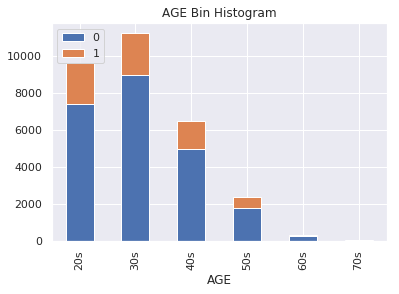

In [15]:
AGE_bin = [20, 30, 40, 50, 60, 70, 80]
AGE_labels  = [ "20s", "30s", "40s", "50s", "60s", "70s"]
df2["AGE"] = pd.cut(df["AGE"], AGE_bin,right=False, labels=AGE_labels)

df_age = df2.groupby(['AGE', 'default.payment.next.month']).size().unstack(1)
df_age.plot(kind='bar', stacked = True)
plt.legend(loc = 'upper left')
plt.title("AGE Bin Histogram")
fig.show()

df_age['Fraud_rate'] = (df_age[df_age.columns[1]]/(df_age[df_age.columns[0]] + df_age[df_age.columns[1]]))
print(df_age)

#### Note
* Fraud rate is the lowest at 30s.
* From 30s, the older the client, the higher rate of fraud.

<a id='2.7'></a>
## 2.7 PAY

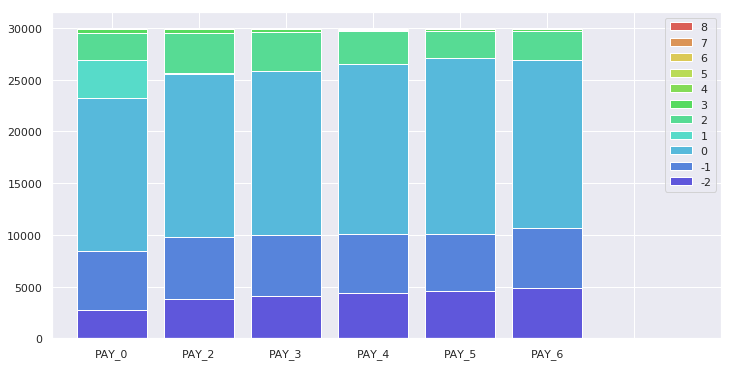

In [16]:
tab = pd.DataFrame(df2["PAY_0"].value_counts().sort_index(ascending=False))

for i in range(2,7):
    tab["PAY_" + str(i)] = df2["PAY_" + str(i)].value_counts().sort_index(ascending=False)
tab = tab.T
 
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
colors = sns.color_palette("hls", 15)

rows, cols = len(tab), len(tab.columns)
x = range(rows)

    
for i, t in enumerate(tab.columns):
    y = tab.iloc[:, i:cols].sum(axis=1)
    ax.bar(x, y, label=t, color = colors[i])
    
ax.set_xticks(range(rows + 2))
ax.set_xticklabels(tab.index)
ax.legend();

#### Note
* The share of revolving payment is large.
* There are few people dalayed for few months. 

I will take look at composition of payments for dafalt and non-default clients separately.

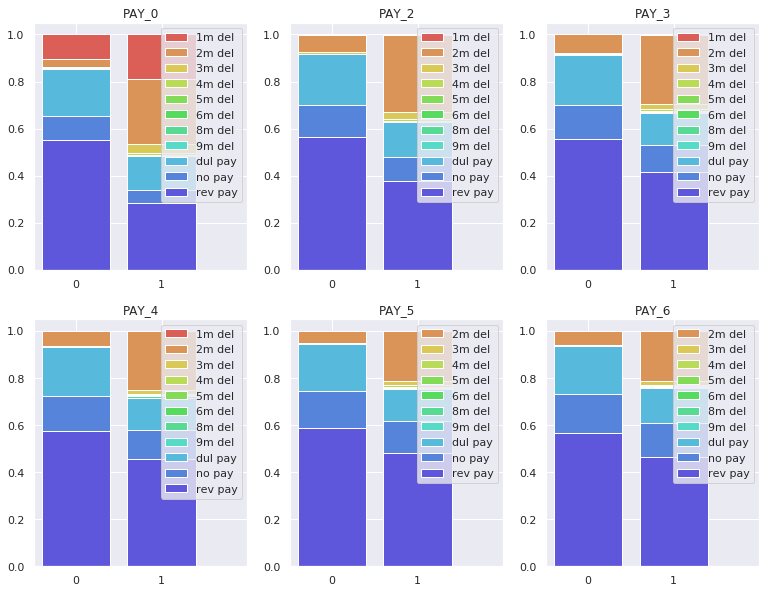

In [17]:
PAY_dict  = {-2:"no pay", -1:"dul pay", 0:"rev pay", 1:"1m del", 2:"2m del",
                                3:"3m del", 4:"4m del", 5:"5m del", 6:"6m del", 7:"8m del", 8:"9m del"}
df2 = df.copy()
from itertools import chain
tab_list = ["PAY_" + str(i) for i in chain(range(0,1),range(2, 7))]
k = 1
fig = plt.figure(figsize=(13,10))
for i in tab_list:
    df2[i] = df2[i].map(PAY_dict)
    tab = pd.crosstab(df2['default.payment.next.month'], df2[i], normalize='index')
    
    ax = fig.add_subplot(2,3, k)
    k = k+1

    rows, cols = len(tab), len(tab.columns)
    x = range(rows)

    for j, t in enumerate(tab.columns):
        y = tab.iloc[:, j:cols].sum(axis=1)
        if((i=='PAY_5')|(i=='PAY_6')):
            ax.bar(x, y, label=t, color = colors[j+1])
        else:
            ax.bar(x, y, label=t, color = colors[j])
    ax.set_xticks(range(rows + 1))
    ax.set_xticklabels(tab.index)
    ax.set_title(i)
    ax.legend();

#### Note
* Obviously, clients with delayed payment are more likely to fall into default.
* But it is still true that there are some people who paid late but still get non-default and vice versa. 

<a id='2.8'></a>
## 2.8 PAY_AMT

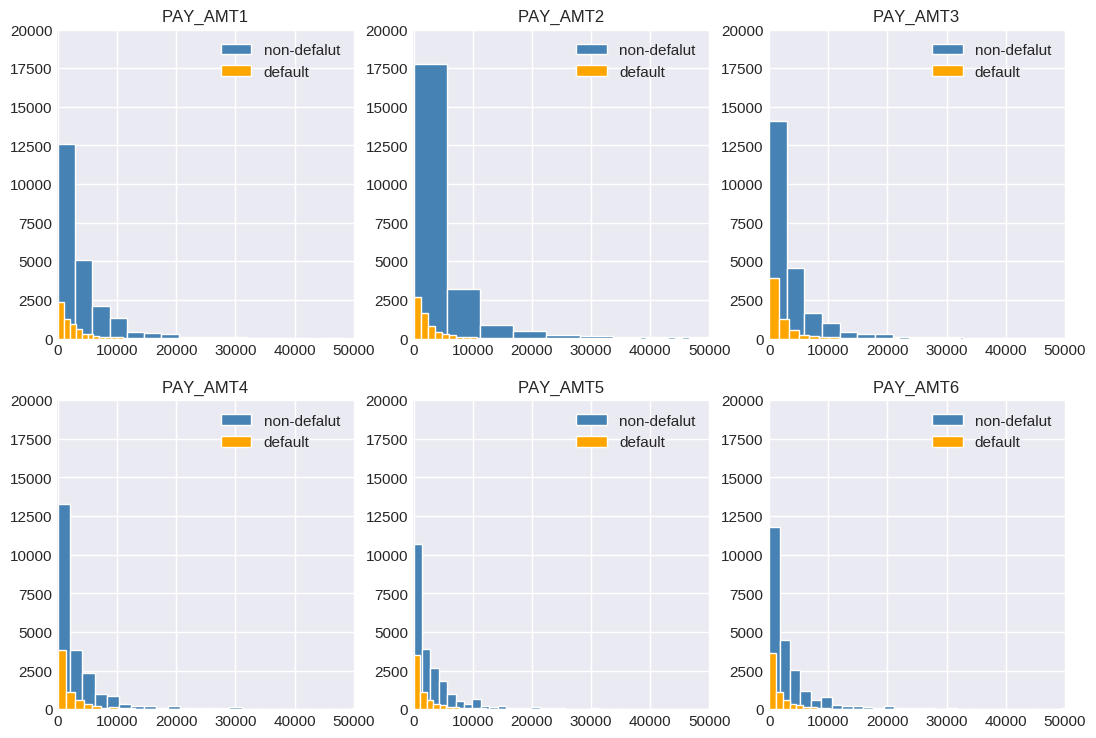

In [18]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.figure(figsize=(13, 9), dpi=100)


cols = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
i = 1
for c in cols:
    plt.subplot(2,3, i)
    plt.hist(df2[c][(df2['default.payment.next.month'] == 0)], bins=300, label='non-defalut', color = 'steelblue')
    plt.hist(df2[c][(df2['default.payment.next.month'] == 1)], bins=300, label='default', color = 'orange')
    plt.legend(loc = 'upper right')
    i = i+1
    plt.xlim(-100,50000)
    plt.ylim(0, 20000)
 
    plt.title(c, fontsize=12, fontweight=0 )

#### Note
* Left skewed distribution due to the small number of people with extremelly high pay_amt
* The extreme values are also seen from the box plots below

(0, 600000)

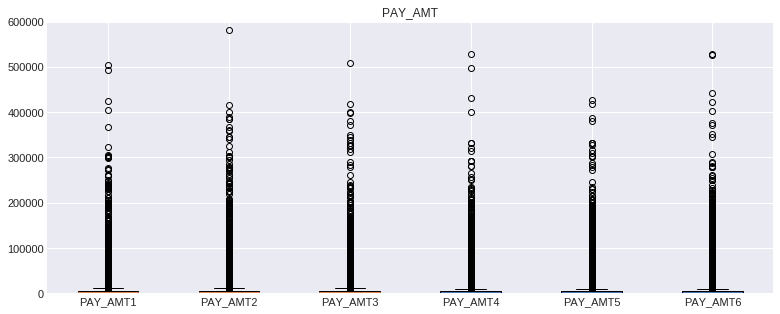

In [19]:
#li = ["PAY_AMT" + str(i) for i in range(1, 7)]

fig = plt.figure(figsize=(13,5))
ax  = fig.add_subplot(111)
ax.set_title("PAY_AMT")
ax.boxplot(df[cols].values, labels=cols, patch_artist=True)
ax.set_facecolor
ax.set_ylim(0,600000)

Let's take a look at the boxes closely for default and non default cases.

Text(0.5, 1.0, 'Default')

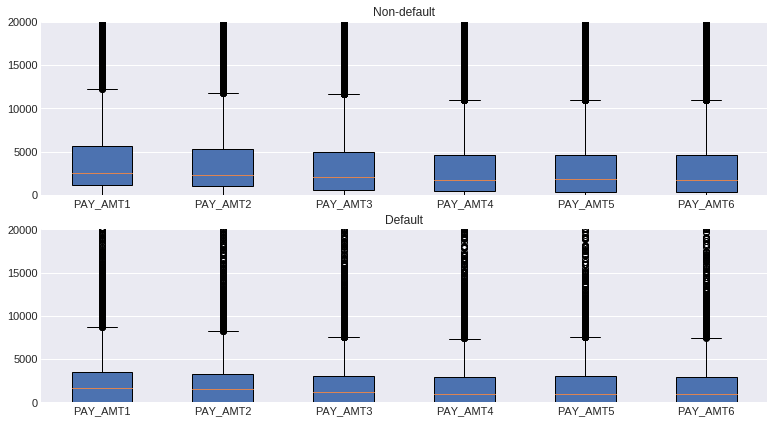

In [20]:
fig = plt.figure(figsize=(13,7))
ax  = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax.set_title("PAY_AMT")
ax.boxplot(df2[cols][df2['default.payment.next.month'] == 0].values, labels=cols, patch_artist=True)
ax2.boxplot(df2[cols][df2['default.payment.next.month'] == 1].values, labels=cols, patch_artist=True)
ax.set_ylim(0,20000)
ax2.set_ylim(0,20000)
ax.set_title('Non-default')
ax2.set_title('Default')

#### Note
* Default clients are distributed at lower PAY_AMT than non-default clients.

<a id='2.9'></a>
## 2.9 BILL_AMT

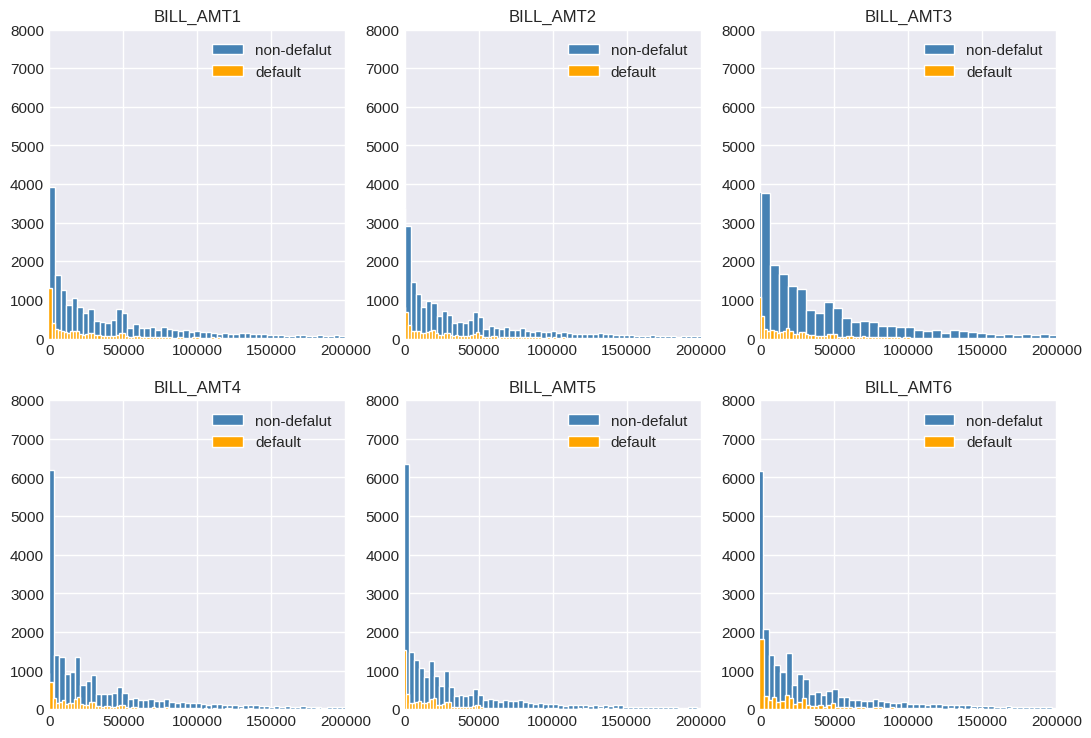

In [21]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.figure(figsize=(13, 9), dpi=100)


cols2 = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
i = 1
for c in cols2:
    plt.subplot(2,3, i)
    plt.hist(df2[c][(df2['default.payment.next.month'] == 0)], bins=300, label='non-defalut', color = 'steelblue')
    plt.hist(df2[c][(df2['default.payment.next.month'] == 1)], bins=300, label='default', color = 'orange')
    plt.legend(loc = 'upper right')
    i = i+1
    plt.xlim(-100,200000)
    plt.ylim(0, 8000)
    
    plt.title(c, fontsize=12, fontweight=0 )

(0, 2000000)

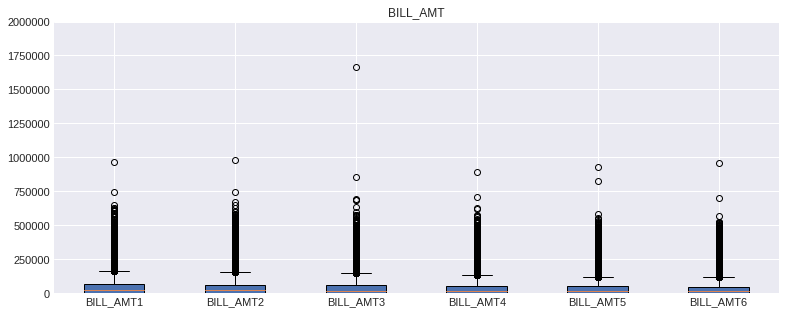

In [22]:
fig = plt.figure(figsize=(13,5))
ax  = fig.add_subplot(111)
ax.set_title("BILL_AMT")
ax.boxplot(df2[cols2].values, labels=cols2, patch_artist=True)
ax.set_facecolor
ax.set_ylim(0,2000000)

Text(0.5, 1.0, 'Default')

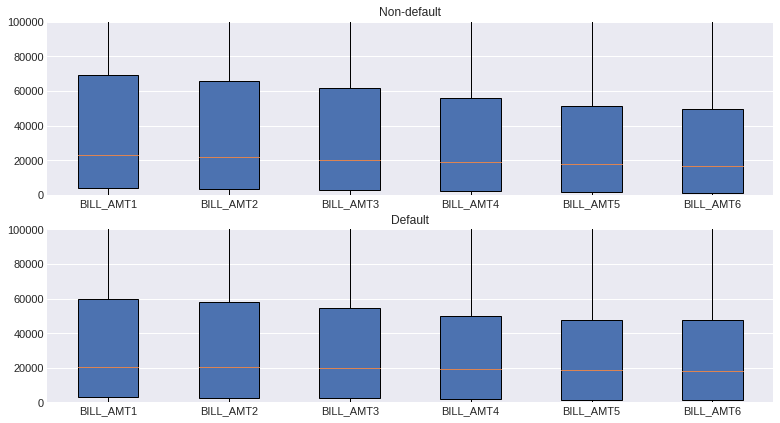

In [23]:
fig = plt.figure(figsize=(13,7))
ax  = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax.set_title("PAY_AMT")
ax.boxplot(df2[cols2][df2['default.payment.next.month'] == 0].values, labels=cols2, patch_artist=True)
ax2.boxplot(df2[cols2][df2['default.payment.next.month'] == 1].values, labels=cols2, patch_artist=True)
ax.set_ylim(0,100000)
ax2.set_ylim(0,100000)
ax.set_title('Non-default')
ax2.set_title('Default')

#### Note
* Like PAY_AMT, there are extremelly high values for BILL_AMT.
* There is not obvious difference in distribtiuon of defalt and non-default, but upper quartile for Non-default seem slighly higher in general. 

Now, let's take a look how all the 6 months quantitative payment values (PAY_AMT, BILL_AMT) and LIMIT_BAL are related. 

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


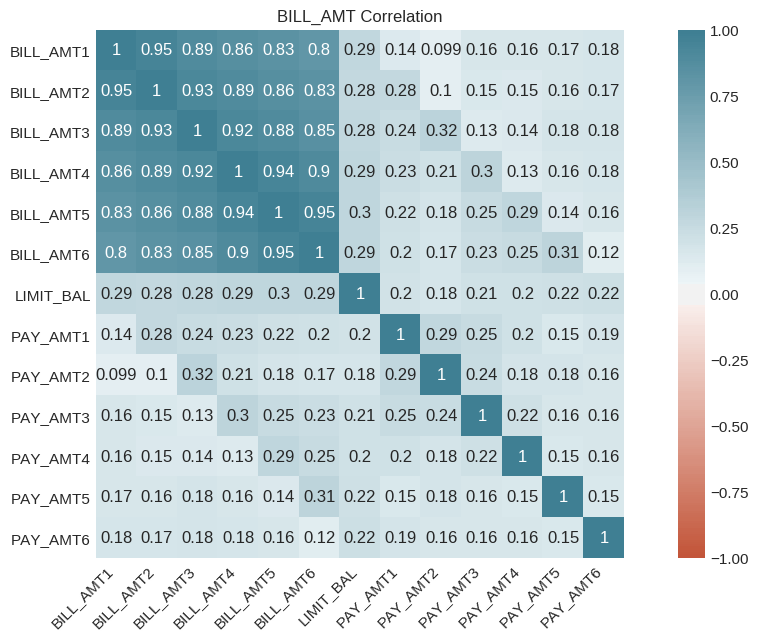

In [24]:
df_bill_amt = df2[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'LIMIT_BAL']]
df_bill_amt[cols] = df2[cols]

plt.figure(figsize=(14, 7), dpi=100)
cm = np.corrcoef(df_bill_amt.values.T) 
corr = df_bill_amt.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('BILL_AMT Correlation')
plt.show()

#### Note:
* BILL_AMT have quite strong correlation among the 6 months. 
* We can also see the correlation between LIMIT_BAL and BILL_AMT
* There is also some correlation between BILL_AMT and PAY_AMT **from one month before**.

<a id='3'></a>
# 3. Data Cleaning

As we saw in the previous section, there were some features that had classes with too small number of samples. Thus, I will combine these classes together as much as possible. 

In [25]:
df3 = df.copy()

In [26]:
# EDUCATION
# Merge -4:others to 0:unknown
df3["EDUCATION"] = df["EDUCATION"].apply( lambda x: (x+1) if ((x>0) and (x<4)) else 1 )

In [27]:
# MARRIAGE 
# Mergee unknown:0 to others 3
df3["MARRIAGE"] = df3["MARRIAGE"].apply(lambda x: x if x>0 else 3 )

<a id='4'></a>
# 4. Model with row data

> #### 4.1[Separate into train and test set](#4,1)
> #### 4.2[Train and predict](#4.2)
> #### 4.3[Check the result](#4.3)

<a id='4.1'></a>
### 4.1 Separate into train and test set

In [28]:
dffin = df3.copy()
dffin.drop("ID", axis = 1,  inplace = True)
X = dffin.drop("default.payment.next.month", axis = 1,  inplace = False)
y = dffin.loc[:,"default.payment.next.month"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<a id='4.2'></a>
### 4.2 Train and Predict

I will use Random Forest just for now.

In [29]:
import sklearn.ensemble
rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_predrf = rf.predict_proba(X_test)[:,1]

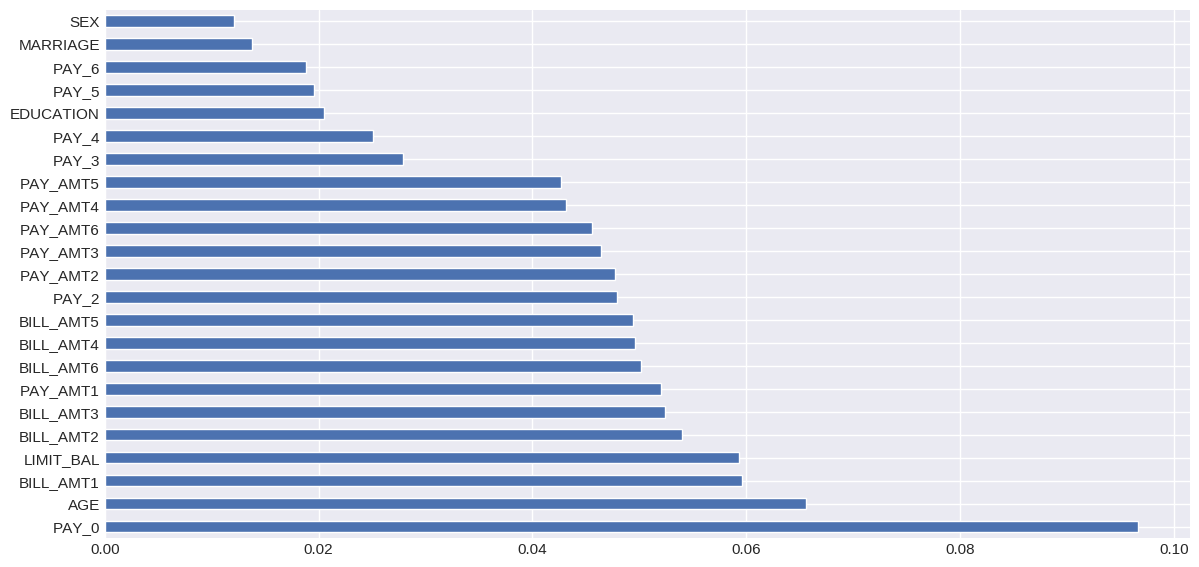

In [30]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(14, 7), dpi=100)
feat_importances.plot(kind='barh')

The correlation of each feature to the target values are:

In [31]:
cori = []
for col in df3.columns:
    print(col,'     ', df3[col].dtypes)
    cori.append([col, df3[col].corr(df3['default.payment.next.month'])])
df_cor = pd.DataFrame(sorted(cori, key = lambda x: abs(x[1]), reverse = True), columns = ['feature', 'corr'])


ID       int64
LIMIT_BAL       float64
SEX       int64
EDUCATION       int64
MARRIAGE       int64
AGE       int64
PAY_0       int64
PAY_2       int64
PAY_3       int64
PAY_4       int64
PAY_5       int64
PAY_6       int64
BILL_AMT1       float64
BILL_AMT2       float64
BILL_AMT3       float64
BILL_AMT4       float64
BILL_AMT5       float64
BILL_AMT6       float64
PAY_AMT1       float64
PAY_AMT2       float64
PAY_AMT3       float64
PAY_AMT4       float64
PAY_AMT5       float64
PAY_AMT6       float64
default.payment.next.month       int64


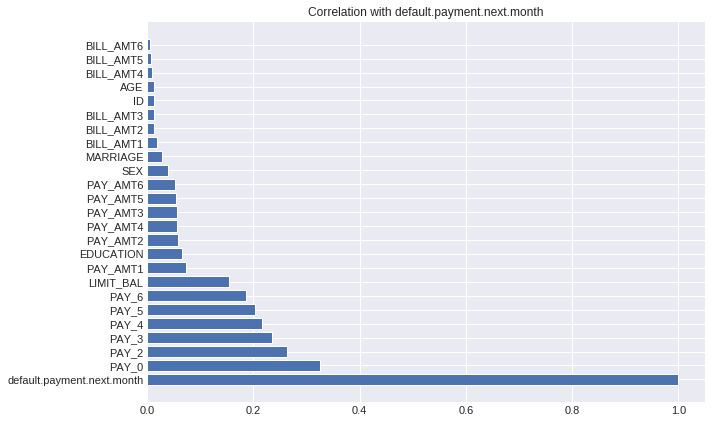

In [32]:
plt.figure(figsize=(10, 7))
plt.barh(df_cor['feature'], np.abs(df_cor['corr']))
plt.title("Correlation with default.payment.next.month")
plt.show()

<a id='4.3'></a>
### 4.3 Check the result

In [33]:
def plot_roc(fpr, tpr, y_target, y_predicted):
    auc = roc_auc_score(y_target, y_predicted)
    gini = 2*auc-1
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC (AUC: {:.3f}, GINI: {:.3f})'.format(auc,gini) )
    plt.legend()
    plt.show()

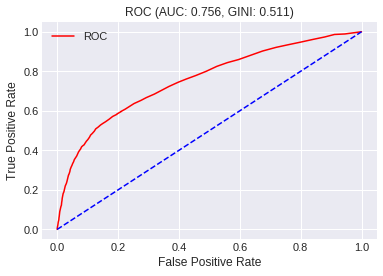

In [34]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_predrf)
plot_roc(fpr, tpr, Y_test, Y_predrf)

#### Note
* GINI with row data was 0.44, which is not very bad, but still has space for improve. 
* In terms of feature importance, AGE has PAY_1(the payment status of 1 month ago) has the biggest impact on the model.
* BILL_AMT comes top as well, but as we saw in section 2, they are correlated, and so is LIMIT_BAL.
* SEX and MARRIAGE has low impact.
* PAY have strong correlation with the target value.
* BILL on the other hand have relatively weak correlation.
* AGE is also ranked low.

<a id='5'></a>
# 5. Feature Processing

Considering the observations from Section 2 and Section 4, I will further process the features in order to improve my model.

In [35]:
df5 = df3.copy()

In [36]:
# Check how many times clients paid late
# Check whether the client's payment status is constant but delay

dft = df5[cols]
df5['delay_count'] = (dft>=1).sum(axis = 1)

df5['constant_payer'] = (df5[cols].std(axis=1)== 0).astype(int)
df5[df5['delay_count']>0]['constant_payer'] = 0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# Ratio of BILL and LIMIT_BAL
df5['UsedRate6'] = df5.BILL_AMT6 / df5.LIMIT_BAL
df5['UsedRate5'] = df5.BILL_AMT5 / df5.LIMIT_BAL
df5['UsedRate4'] = df5.BILL_AMT4 / df5.LIMIT_BAL
df5['UsedRate3'] = df5.BILL_AMT3 / df5.LIMIT_BAL
df5['UsedRate2'] = df5.BILL_AMT2 / df5.LIMIT_BAL
df5['UsedRate1'] = df5.BILL_AMT1 / df5.LIMIT_BAL

<a id='6'></a>
# 6. Feature Selection

First, I will build Random Forest model with all features. Then, I will select some important features and use XGBoost to predict.

In [38]:
dffin = df5.copy()
dffin.drop("ID", axis = 1,  inplace = True)
X = dffin.drop("default.payment.next.month", axis = 1,  inplace = False)
y = dffin.loc[:,"default.payment.next.month"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [39]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_predrf = rf.predict_proba(X_test)[:,1]

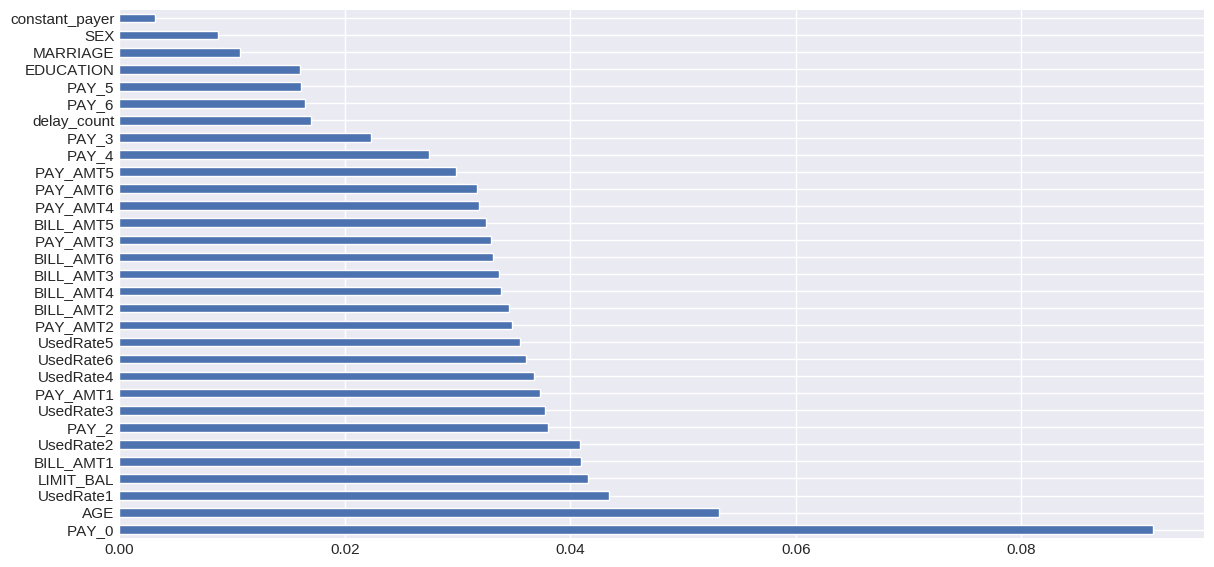

In [41]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(14, 7), dpi=100)
feat_importances.plot(kind='barh')

In [42]:
cori = []
for col in dffin.columns:
    print(col,'     ', dffin[col].dtypes)
    cori.append([col, dffin[col].corr(dffin['default.payment.next.month'])])
df_cor = pd.DataFrame(sorted(cori, key = lambda x: abs(x[1]), reverse = True), columns = ['feature', 'corr'])


LIMIT_BAL       float64
SEX       int64
EDUCATION       int64
MARRIAGE       int64
AGE       int64
PAY_0       int64
PAY_2       int64
PAY_3       int64
PAY_4       int64
PAY_5       int64
PAY_6       int64
BILL_AMT1       float64
BILL_AMT2       float64
BILL_AMT3       float64
BILL_AMT4       float64
BILL_AMT5       float64
BILL_AMT6       float64
PAY_AMT1       float64
PAY_AMT2       float64
PAY_AMT3       float64
PAY_AMT4       float64
PAY_AMT5       float64
PAY_AMT6       float64
default.payment.next.month       int64
delay_count       int64
constant_payer       int64
UsedRate6       float64
UsedRate5       float64
UsedRate4       float64
UsedRate3       float64
UsedRate2       float64
UsedRate1       float64


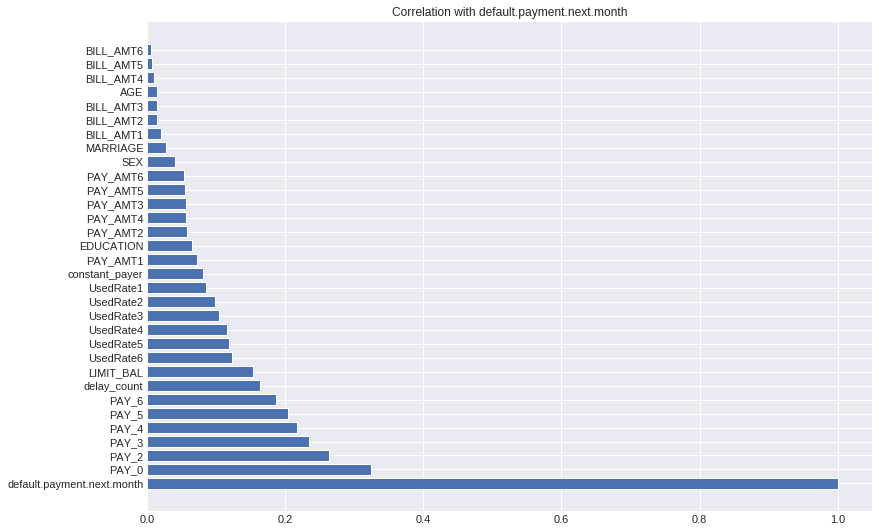

In [43]:
plt.figure(figsize=(13, 9))
plt.barh(df_cor['feature'], np.abs(df_cor['corr']))
plt.title("Correlation with default.payment.next.month")
plt.show()

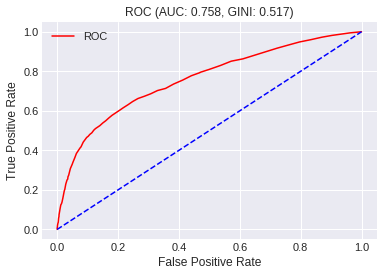

In [44]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_predrf)
plot_roc(fpr, tpr, Y_test, Y_predrf)


#### Let's select the features.
* I will just pick the features with high correlations and high importances.

In [45]:
list(df_cor['feature'])

['default.payment.next.month',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'delay_count',
 'LIMIT_BAL',
 'UsedRate6',
 'UsedRate5',
 'UsedRate4',
 'UsedRate3',
 'UsedRate2',
 'UsedRate1',
 'constant_payer',
 'PAY_AMT1',
 'EDUCATION',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT3',
 'PAY_AMT5',
 'PAY_AMT6',
 'SEX',
 'MARRIAGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'AGE',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6']

In [46]:
final_features = [
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'delay_count',
 'LIMIT_BAL',
 'UsedRate6',
 'UsedRate5',
 'UsedRate4',
 'UsedRate3',
 'UsedRate2',
 'UsedRate1',
 'constant_payer',
 'PAY_AMT1',
 'EDUCATION',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT3',
 'PAY_AMT5',
 'PAY_AMT6',
 'SEX',
 'MARRIAGE',
 'AGE'
]

In [47]:

X = dffin.loc[:,final_features]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
rf = sklearn.ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_predrf = rf.predict_proba(X_test)[:,1]

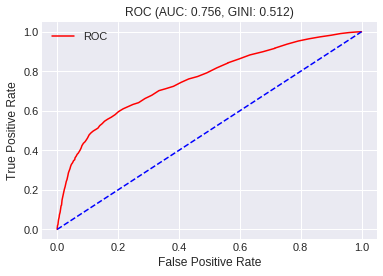

In [49]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_predrf)
plot_roc(fpr, tpr, Y_test, Y_predrf)

* Improved a little bit.
* Demographic information is working weak.

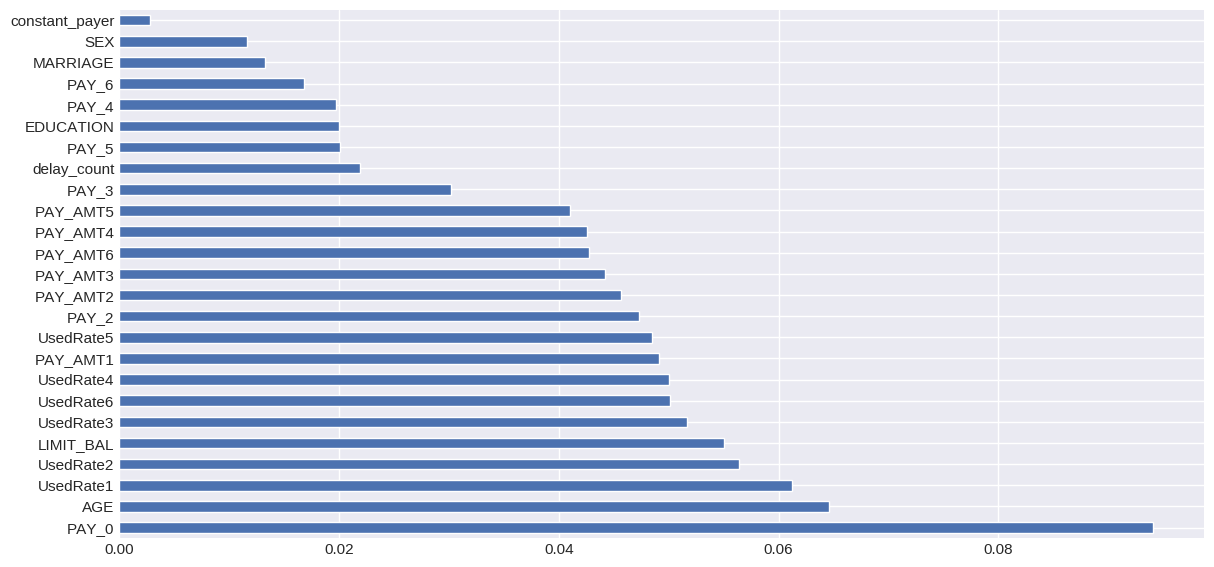

In [50]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(14, 7), dpi=100)
feat_importances.plot(kind='barh')

<a id='7'></a>
# 7. Train and Predict

This is the last part of my work! 
- I will use XGBoost for the classification. 

In [51]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn import model_selection
import math
from sklearn.model_selection import GridSearchCV
# grid_param = {
#     'gamma':[7, 9],
#     'eta':[0.6, 0.8],
#     'n_estimators':[100, 1000],
#     'max_depth':[4, 7],
#     'learning_rate':[0.1, 0.01],
#     'eval_metric':['auc'],
#     'object':['binary:logistic'],
#     'subsample': [0.7, 0,9],
    
#     }
# Xgb = XGBClassifier()
# cv = GridSearchCV(Xgb, grid_param, cv = 5, n_jobs =-1,verbose=True)
# cv.fit(X_train, Y_train)
# print(cv.best_params_, cv.best_score_)

In [52]:

Xgbcv = XGBClassifier(gamma = 9, eta= 0.8, learning_rate= 0.01, max_depth=4, n_estimators=1000, subsample= 0.7)
Xgbcv.fit(X_train, Y_train)
Y_pred = Xgbcv.predict(X_test)


In [53]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[6701  339]
 [1262  698]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



Got much better than the previous model!